# <font color='blue'> Comparative Analysis of SQL and NoSQL Databases and Performance Evaluation:
# <div style="text-align:center;"><font color='blue'>Report

##  Introduction:

   This study aims to carry out an examination of SQL and different types of NoSQL databases, with a particular focus on structured data storage systems such as relational databases (PostgreSQL), document-oriented databases like MongoDB and graph databases similar to Neo4j.The main goals of this study include designing, analyzing, and comparing these databases based on their data models, query languages, and overall performance attributes.

##  The Data Generated:

The data generated is for a secret organization called Spectre. The data is sourced from Mockaroo https://www.mockaroo.com/ in SQL format, that maintains information about:
1- Secret <font color='green'>agents<font color='black'>.
2- The <font color='green'>agent<font color='black'>'s used secret identities.
3- The agents's different <font color='green'>contacts<font color='black'>.
4- The conducted <font color='green'>missions<font color='black'>.
5- The <font color='green'>targets<font color='black'> of the missions.
6- The used <font color='green'>assets<font color='black'> in the missions.
7- And the agent's <font color='green'>skills<font color='black'> is generated manually.
 

## The data Models:

### 1- Structured data storage systems (PostgreSQL):

The used modeling tool for the relational database is ERDplus https://erdplus.com/.

![Local Image](ER-diagram.png)
### <div style="text-align:center;"><font color='Blue'>ER Diagram

![Local Image](relational-schema.png)
### <div style="text-align:center;"><font color='blue'>Relational Schema

### 2- Document-oriented databases (MongoDB):

The used modeling tool for MongoDB database is Moon modeler https://www.datensen.com/data-modeling/moon-modeler-for-databases.html

![Local Image](Mongodb-schema.png)
### <div style="text-align:center;"><font color='blue'>MongoDB Schema

### 3- Graph databases (Neo4j):

The used modeling tool for Neo4j database is Neo4j command (CALL apoc.meta.graph) in Neo4j.

![Local Image](neo4j-schema.png)
### <div style="text-align:center;"><font color='blue'>Neo4j Schema

## Populating Data process:

### 1- PostgreSQL:

For PostgreSQL the process of populating the data is done directly using the generated data from Mockaroo in SQL format. in (.txt) format in the attached file.<font color='brown'>
1- agents_data (10000 insertion, 14 update).
2- assets_data (60000 insertion, one update).
3- contacts data (10004 insertion).
4- has_data (10174 insertion).
5- missions_data (10000 insertion, one update).
6- participate_in_data (40011 insertion).
7- SIDs_data (10008 insertion).
8- skills_data (197 insertion).
9- targets_data (10000 insertion and 10000 update).
10- used_in_data (40042 insertion).


### 2- MongoDB:

To populate the data in MongoDB database, Python is used to query the data from PostgreSQL tables and populate MongoDB database.

#### PostgreSQL and MongoDB Connection Setup:

In [ ]:
# NOTE: don't forget to close the connection at the end.
# to close the connection the commands are at the end of the queries section.
# for PostgreSQL, MongoDB, and Neo4j
# conn.close()
# client.close()
# driver.close()
#
#
import psycopg2
import pymongo
from pymongo import MongoClient
import datetime

# postgres connection
conn = psycopg2.connect(
    dbname="spectre",
    user="postgres",
    password="*******",
    host="localhost",
    port="5432"
)

# Mongodb connection
client = MongoClient("mongodb+srv://ak:<password>@cluster0.jscsiwg.mongodb.net/")
db = client.Spectre
agents = db.agents
assets = db.assets
missions = db.missions
targets = db.targets

#### <font color='brown'>a- agents information:

In [ ]:
query = "SELECT * FROM agents"
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    doc = {
           "acode": row[0], "fname": row[1], "lname": row[2], "dob": f'{row[3].year}-{row[3].month}-{row[3].day}',
            "gender": row[4], "nationality": row[5], "security_level": row[6], "agent_type": row[7], "agent_status": row[8]
          }
    agents.insert_one(doc)                                                       

cur.close()

#### <font color='brown'>b- agents contacts:

In [ ]:
i = 0

while i <= 10000:
    query = f"SELECT * FROM contacts where acode = {i}"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    contacts = []

    for row in rows:
        filter_criteria = {"acode": row[0]}

        if row[7]:
            doc = {
                   "phone": row[1], "email": row[2], "address_line 1": row[3], "city": row[4],
                   "country": row[5], "from_date": f'{row[6].year}-{row[6].month}-{row[6].day}',
                   "to_date": f'{row[7].year}-{row[7].month}-{row[7].day}'
                  }
            contacts.append(doc)
        else:
            doc = {
                   "phone": row[1], "email": row[2], "address_line 1": row[3], "city": row[4],
                   "country": row[5], "from_date": f'{row[6].year}-{row[6].month}-{row[6].day}',
                   "to_date": row[7]
                  }
            contacts.append(doc)
        
    if contacts:
        new_contacts = {"$set": {'contacts': contacts}}
        agents.update_one(filter_criteria, new_contacts)

    i = i+1

cur.close()

#### <font color='brown'>c- agents SIDs:

In [ ]:
acode = 0

while acode <= 10000:
    query = f"select * from secret_identities where acode = {acode}"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    sids = []

    for row in rows:
        filter_criteria = {"acode": acode}
        doc = {'sid': row[0], 'sid_type': row[1], 'sid_nationality': row[2], 'sid_other_details': row[3],
               'sid_status': row[4], 'sid_issue_date': f'{row[5].year}-{row[5].month}-{row[5].day}', 
               'sid_exp_date': f'{row[6].year}-{row[6].month}-{row[6].day}'
              }
        sids.append(doc)

        if sids:
            new_sids = {"$set": {'secret_identities': sids}}
            agents.update_one(filter_criteria, new_sids)
            
    acode = acode+1
    
cur.close()

#### <font color='brown'>d- agents skills:

In [ ]:
acode = 0

while acode <= 10000:
    query = f"select skills.skill_type,skills.skill_level from has inner join skills on has.skill_code = skills.skill_code where has.acode = {acode}"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    skills = []

    for row in rows:
        filter_criteria = {"acode": acode}
        doc = {'skill_type': row[0], 'skill_level': row[1]}
        skills.append(doc)

        if skills:
            new_skills = {"$set": {'skills': skills}}
            agents.update_one(filter_criteria, new_skills)
            
    acode = acode+1
    
cur.close()

#### <font color='brown'>e- assets information:

In [ ]:
query = "SELECT * FROM assets"
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    doc = {"asid": row[0], "astype": row[1], "asmake": row[2],"asmodel": row[3], "astag": row[4],"asstatus": row[5]}
    assets.insert_one(doc)

cur.close()

#### <font color='brown'>f- missions information:

In [ ]:
query = "SELECT * FROM missions"
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    doc = {
           'mid': row[0], 'general_description': row[1], 'city': row[2], 'country': row[3], 
           'start_date': f'{row[4].year}-{row[4].month}-{row[4].day}',
           'end_date': f'{row[5].year}-{row[5].month}-{row[5].day}',
           'mstatus': row[6], 'tid': row[7]
          }
    missions.insert_one(doc)                                                       

cur.close()

#### <font color='brown'>g- missions agents:

In [ ]:
i = 0

while i <= 10000:
    query = f"SELECT * FROM participate_in where mid = {i}"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    agents = []

    for row in rows:
        filter_criteria = {"mid": row[1]}
        agents.append(row[0])

    if agents:
        mission_agents = {"$set": {'agents': agents}}
        missions.update_one(filter_criteria, mission_agents)
    i = i+1

cur.close()

#### <font color='brown'>h- missions assets:

In [ ]:
i = 0

while i <= 10000:
    query = f"SELECT * FROM used_in where mid = {i}"
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    assets = []

    for row in rows:
        filter_criteria = {"mid": row[1]}
        assets.append(row[0])

    if assets:
        mission_assets = {"$set": {'assets': assets}}
        missions.update_one(filter_criteria, mission_assets)

    i = i+1

cur.close()

#### <font color='brown'>i- targets information:

In [ ]:
query = "SELECT * FROM targets"
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    doc = {"tid": row[0], "ttype": row[1], "tdescription": row[2]}
    targets.insert_one(doc)

cur.close()

### 2- Neo4j:

To populate the data in Neo4j, Python is used to query the data from MongoDB database and populate it in Neo4j database.

#### Neo4j Connection Setup:

In [ ]:
# NOTE: don't forget to close the connection at the end.
# to close the connection the commands are at the end of the queries section.
# for PostgreSQL, MongoDB, and Neo4j
# conn.close()
# client.close()
# driver.close()
#
#
from neo4j import GraphDatabase

#Neo4j connection
#
#
#Define the URI, username, and password for your Neo4j database
uri = "bolt://localhost:7687"
username = "neo4j"
password = "*******"

# Create a connection to the database
driver = GraphDatabase.driver(uri, auth=(username, password))

In [ ]:
# Function for Neo4j run()
    
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return result

#### <font color='orange'>a- agents information:

In [ ]:
# retrieve the data from Mongodb DB
docs = agents.find()

for document in docs:
    query = '''MERGE
                (a:Agent {acode: $acode, fname: $fname, lname: $lname,
                dob: $dob, gender: $gender, nationality: $nationality,
                security_level: $security_level, agent_type: $agent_type, agent_status: $agent_status});
            '''
    para = {
            'acode':document['acode'], 'fname': document['fname'], 'lname': document['lname'], 'dob': document['dob'],
            'gender': document['gender'], 'nationality': document['nationality'],
            'security_level': document['security_level'], 'agent_type': document['agent_type'], 'agent_status': document['agent_status']
           }
    print(run_query(query,para))

#### <font color='orange'>b- agents contacts:

In [ ]:
# retrieve the data from Mongodb DB
docs = agents.find(projection=projection)
projection = {'acode' : 1, 'contacts': 1}

for doc in docs:
    if "contacts" in doc:
        for s in doc['contacts']:
            query = '''
                MATCH (a:Agent{acode: $acode})
                MERGE (a)-[r:contacts]->(s:agentContacts{
                    phone: $phone,
                    email: $email,
                    address_line_1: $address_line_1,
                    city: $city,
                    country: $country,
                    from_date: $from_date,
                    to_date: $to_date
                })
                RETURN a, r, s
            '''
            para = {
                'acode': doc['acode'],
                'phone': s['phone'],
                'email': s['email'],
                'address_line_1': s['address_line 1'],
                'city': s['city'],
                'country': s['country'],
                'from_date': s['from_date'],
                'to_date': s['to_date']
            }

            print(run_query(query,para))

#### <font color='orange'>c- agents SIDs:

In [ ]:
# retrieve the data from Mongodb DB
docs = agents.find(projection=projection)
projection = {'acode' : 1, 'secret_identities': 1}

for doc in docs:
    if "secret_identities" in doc:
        for s in doc['secret_identities']:
            query = '''
                MATCH (a:Agent{acode: $acode})
                MERGE (a)-[r:HasSid]->(s:SecretIdentities{
                    sid: $sid,
                    sid_type: $sid_type,
                    sid_nationality: $sid_nationality,
                    sid_other_details: $sid_other_details,
                    sid_status: $sid_status,
                    sid_issue_date: $sid_issue_date,
                    sid_exp_date: $sid_exp_date
                })
                RETURN a, r, s
            '''
            para = {
                'acode': doc['acode'],
                'sid': s['sid'],
                'sid_type': s['sid_type'],
                'sid_nationality': s['sid_nationality'],
                'sid_other_details': s['sid_other_details'],
                'sid_status': s['sid_status'],
                'sid_issue_date': s['sid_issue_date'],
                'sid_exp_date': s['sid_exp_date']
            }


            print(run_query(query,para))

#### <font color='orange'>d- agents skills:

In [ ]:
# retrieve the data from Mongodb DB
docs = agents.find(projection=projection)
projection = {'acode' : 1, 'skills': 1}

for doc in docs:
    if "skills" in doc:
        #print(doc["acode"])
        for s in doc['skills']:
            query = '''
                           MATCH (a:Agent{acode:$acode})
                           MERGE (a)-[r:has{skill_type: $skill_type, skill_level: $skill_level}]->(s:skill)
                           RETURN a, r, s
                    ''' 
            para = {'acode': doc['acode'], 'skill_type': s['skill_type'], 'skill_level': s['skill_level']}
            print(run_query(query,para))

#### <font color='orange'>e- assets:

In [ ]:
# retrieve the data from Mongodb DB
docs = assets.find()

for doc in docs:
    query = '''
                MERGE (a:assets{
                    asid: $asid,
                    astype: $astype,
                    asmake: $asmake,
                    asmodel: $asmodel,
                    astag: $astag,
                    asstatus: $asstatus
                })
                RETURN a
            '''
    para = {
                'asid': doc['asid'],
                'astype': doc['astype'],
                'asmake': doc['asmake'],
                'asmodel': doc['asmodel'],
                'astag': doc['astag'],
                'asstatus': doc['asstatus']
            }
    print(run_query(query,para))

#### <font color='orange'>f- missions information:

In [ ]:
# retrieve the data from Mongodb DB
docs = missions.find()

for doc in docs:
    query = '''
                MERGE (m:missions{
                    mid: $mid,
                    general_description: $general_description,
                    city: $city,
                    country: $country,
                    start_date: $start_date,
                    end_date: $end_date,
                    mstatus: $mstatus
                })
                RETURN m
            '''
    para = {
                'mid': doc['mid'],
                'general_description': doc['general_description'],
                'city': doc['city'],
                'country': doc['country'],
                'start_date': doc['start_date'],
                'end_date': doc['end_date'],
                'mstatus': doc['mstatus']
            }

    print(run_query(query,para))

#### <font color='orange'>g- targets:

In [ ]:
# retrieve the data from Mongodb DB
docs = targets.find()

for doc in docs:
    query = '''
                MERGE (t:targets{
                    tid: $tid,
                    ttype: $ttype,
                    tdescription: $tdescription
                })
                RETURN t
            '''
    para = {
                'tid': doc['tid'],
                'ttype': doc['ttype'],
                'tdescription': doc['tdescription']
            }

    print(run_query(query,para))

#### <font color='orange'>h- participatedIn:

In [ ]:
# retrieve the data from Mongodb DB
docs = missions.find()

for doc in docs:
    if 'agents' in doc:
        for acode in doc['agents']:
            query = '''
                                    MATCH (m:missions{mid:$mid})
                                    MATCH (a:Agent{acode:$acode})
                                    MERGE (a)-[r:participatedIn]->(m)
                                    RETURN r
                                '''
            para = {
                                'mid': doc['mid'],
                                'acode': acode
                                }

            print(run_query(query,para))

#### <font color='orange'>i- usedIn:

In [ ]:
# retrieve the data from Mongodb DB
docs = missions.find()

for doc in docs:
    if 'assets' in doc:
        for asid in doc['assets']:
            query = '''
                                    MATCH (m:missions{mid:$mid})
                                    MATCH (a:assets{asid:$asid})
                                    MERGE (a)-[r:usedIn]->(m)
                                    RETURN r
                                '''
            para = {
                                'mid': doc['mid'],
                                'asid': asid
                                }

            print(run_query(query,para))

#### <font color='orange'>j- targeted:

In [ ]:
# retrieve the data from Mongodb DB 
docs = missions.find()

for doc in docs:
    if 'tid' in doc:
        query = '''
                MATCH (m:missions{mid:$mid})
                MATCH (t:targets{tid:$tid})
                MERGE (m)-[r:targeted]->(t)
                RETURN r
            '''
        para = {
                'mid': doc['mid'],
                'tid': doc['tid']
            }

        print(run_query(query,para))

## Queries:

### A- PostgreSQL Queries:

##### <font color='majenta'>1- Retrieve Agent Information:

In [ ]:
%%time
query = "SELECT * FROM agents WHERE fname = 'Sonia';"

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>2- List Ongoing Missions:

In [ ]:
%%time
para = "ongoing"
query = 'SELECT * FROM missions WHERE mstatus = %s;'

cur = conn.cursor()
cur.execute(query, (para,))
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>3- Get Contact Information for a Specific agent:

In [ ]:
%%time
query = 'SELECT * FROM contacts WHERE acode = 2008;'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close()

##### <font color='majenta'>4- List Missions Assigned to a Specific Agent:

In [ ]:
%%time
query = 'SELECT * FROM participate_in WHERE acode = 10;'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close()

##### <font color='majenta'>5- Retrieve Completed Missions:

In [ ]:
%%time
para = 'completed'
query = 'SELECT mid FROM missions WHERE mstatus = %s;'

cur = conn.cursor()
cur.execute(query, (para,))
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>6 - Find all missions a specific asset is used for:

In [ ]:
%%time
para = 'WA1VMAFE7BD052704'
query = 'SELECT used_in.mid FROM used_in, assets WHERE assets.astag = %s AND used_in.asid = assets.asid;'

cur = conn.cursor()
cur.execute(query, (para,))
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>7- Count the Number of Missions for Each agent:

In [ ]:
%%time
query = 'SELECT acode, COUNT(acode) AS number_of_missions FROM participate_in GROUP BY acode ORDER BY number_of_missions DESC;'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>8- List Agents who are qualified (based on a set of skills) that are suitable for a mission,agent who fluent in  mandarin chinese languages, has high skill and knowledge in legal acumen:

In [ ]:
%%time
skill_types = ['mandarin chinese', 'legal acumen']
min_skill_level = 3
num_skill_types = len(skill_types)
query = """
            SELECT has.acode 
            FROM has
            INNER JOIN skills ON has.skill_code = skills.skill_code
            WHERE skills.skill_type IN ({})
            AND skills.skill_level > %s
            GROUP BY has.acode
            HAVING COUNT(DISTINCT skills.skill_type) = %s
        """.format(', '.join(['%s'] * num_skill_types))

para = tuple(skill_types + [min_skill_level, num_skill_types])
cur = conn.cursor()
cur.execute(query, para)
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

##### <font color='majenta'>9- Retrieve Missions Within a Date Range:

In [ ]:
%%time
start_date = '2010-01-01'
end_date = '2010-12-31'
query = """
            SELECT * 
            FROM missions 
            WHERE start_date BETWEEN %s AND %s
            ORDER BY start_date;
        """
params = (start_date, end_date)

cur = conn.cursor()
cur.execute(query, params)
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

##### <font color='majenta'>10- Find Assets Assigned to ongoing missions:

In [ ]:
%%time
query = """
            SELECT used_in.asid
            FROM used_in
            INNER JOIN missions ON used_in.mid = missions.mid
            WHERE missions.mstatus = %s;
        """
mstatus = 'ongoing'

cur = conn.cursor()
cur.execute(query, (mstatus,))
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

##### <font color='majenta'>11- List Missions Involving Multiple Agents:

In [ ]:
%%time
query = 'SELECT mid, COUNT(acode) FROM participate_in GROUP BY mid HAVING COUNT(acode) > 1 ORDER BY mid;'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close() 

##### <font color='majenta'>12- find the agent who used a certain secret identity in a specific region:

In [ ]:
%%time
query = """
            SELECT acode
            FROM secret_identities
            WHERE sid_nationality = %s
            AND sid_other_details = %s;
        """
params = ('CN', '572-334-5595')

cur = conn.cursor()
cur.execute(query, params)
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

##### <font color='majenta'>13- Find all personnel involved in the operation “144” who are currently 'active', speak Russian, and who lived in London in 2021. List their code names in this operation,agent's type as well as their current locations.:

In [ ]:
%%time
query = """
            SELECT agents.acode, agents.agent_type, current_contacts.city
            FROM agents
            INNER JOIN participate_in ON participate_in.acode = agents.acode
            INNER JOIN has ON has.acode = agents.acode
            INNER JOIN contacts ON contacts.acode = agents.acode
            INNER JOIN current_contacts ON current_contacts.acode = agents.acode
            WHERE participate_in.mid = %s
            AND agents.agent_status = %s
            AND has.skill_code IN %s
            AND contacts.city = %s
            AND contacts.from_date BETWEEN %s AND %s;
        """

# Define the parameters
params = (
            144,                     # mid
            'active',                # agent_status
            (43, 44, 45, 46, 47, 48),# skill_code list
            'London',                # city
            '2021-01-01',            # from_date
            '2021-12-31'             # to_date
        )

cur = conn.cursor()
cur.execute(query, params)
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

##### <font color='majenta'>14- find all the firearms that are out in the field in a region:

In [ ]:
%%time
query = """
            SELECT assets.asid, assets.astype, assets.asmake
            FROM assets
            INNER JOIN used_in ON assets.asid = used_in.asid
            INNER JOIN missions ON used_in.mid = missions.mid
            WHERE missions.country = %s
            AND assets.asstatus = %s;
        """

# Define the parameters
country = 'PL'
asstatus = 'active'

cur = conn.cursor()
cur.execute(query, (country, asstatus))
results = cur.fetchall()

for row in results:
    print(row)

cur.close()

In [ ]:
# To close the connection of PostgreSQL
conn.close()

### B- MongoDB Queries:

##### <font color='majenta'>1- Retrieve Agent Information:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'fname': 'Sonia'
                    }
                }
          ]
results = agents.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>2- List Ongoing Missions:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'mstatus': 'ongoing'
                    }
                }
          ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>3- Get Contact Information for a Specific agent:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'acode': 2008
                    }
                }, {
                    '$project': {
                        'contacts': 1
                    }
                }
          ]

results = agents.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>4- List Missions Assigned to a Specific Agent:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'agents': 10
                    }
                }, {
                    '$project': {
                        'mission': '$mid'
                    }
                }
          ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>5- Retrieve Completed Missions:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'mstatus': 'completed'
                    }
                }
          ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>6 - Find all missions a specific asset is used for:

In [ ]:
%%time
pipeline = [
                {
                    '$unwind': {
                        'path': '$assets'
                    }
                }, {
                    '$lookup': {
                        'from': 'assets', 
                        'localField': 'assets', 
                        'foreignField': 'asid', 
                        'as': 'assets'
                    }
                }, {
                    '$project': {
                        'mid': '$mid', 
                        'asset tag': '$assets.astag'
                    }
                }, {
                    '$match': {
                        'assets.astag': 'WA1VMAFE7BD052704'
                    }
                }
          ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>7- Count the Number of Missions for Each agent:

In [ ]:
%%time
pipeline = [
                {
                    '$unwind': {
                        'path': '$agents'
                    }
                }, {
                    '$group': {
                        '_id': '$agents', 
                        'missions_count': {
                            '$sum': 1
                        }
                    }
                }
          ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>8- List Agents who are qualified (based on a set of skills) that are suitable for a mission,agent who fluent in  mandarin chinese languages, has high skill and knowledge in legal acumen:

In [ ]:
%%time
pipeline = [
                {
                    '$unwind': {
                        'path': '$skills'
                    }
                }, {
                    '$match': {
                        'skills.skill_type': {
                            '$in': [
                                'mandarin chinese', 'legal acumen'
                            ]
                        }, 
                        'skills.skill_level': {
                            '$gt': 3
                        }
                    }
                }, {
                    '$group': {
                        '_id': '$acode', 
                        'count': {
                            '$sum': 1
                        }
                    }
                }, {
                    '$match': {
                        'count': 2
                    }
                }
            ]

results = agents.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>9- Retrieve Missions Within a Date Range:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'start_date': {
                            '$gte': '2010-01-01'
                        }, 
                        'end_date': {
                            '$lte': '2010-12-31'
                        }
                    }
                }
            ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>10- Find Assets Assigned to ongoing missions:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'mstatus': 'ongoing'
                    }
                }, {
                    '$unwind': {
                        'path': '$assets'
                    }
                }, {
                    '$project': {
                        'assets': '$assets'
                    }
                }
            ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>11- List Missions Involving Multiple Agents:

In [ ]:
%%time
pipeline = [
                {
                    '$unwind': {
                        'path': '$agents'
                    }
                }, {
                    '$group': {
                        '_id': '$mid', 
                        'count': {
                            '$sum': 1
                        }
                    }
                }, {
                    '$match': {
                        'count': {
                            '$gt': 1
                        }
                    }
                }
            ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>12- find the agent who used a certain secret identity in a specific region:

In [ ]:
%%time
pipeline = [
                {
                    '$unwind': {
                        'path': '$secret_identities'
                    }
                }, {
                    '$match': {
                        'secret_identities.sid_other_details': '572-334-5595'
                    }
                }, {
                    '$project': {
                        'acode': '$acode'
                    }
                }
            ]

results = agents.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>13- Find all personnel involved in the operation “144” who are currently 'active', speak Russian, and who lived in London in 2021. List their code names in this operation,agent's type as well as their current locations.:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'mid': 144
                    }
                }, {
                    '$unwind': {
                        'path': '$agents'
                    }
                }, {
                    '$lookup': {
                        'from': 'agents', 
                        'localField': 'agents', 
                        'foreignField': 'acode', 
                        'as': 'agent info'
                    }
                }, {
                    '$project': {
                        'agent': '$agent info'
                    }
                }, {
                    '$match': {
                        'agent.agent_status': 'active', 
                        'agent.skills.skill_type': 'russian', 
                        'agent.contacts.city': 'London', 
                        'agent.contacts.from_date': {
                            '$gte': '2021-01-01', 
                            '$lte': '2021-12-31'
                        }
                    }
                }, {
                    '$project': {
                        'acode': '$agent.acode', 
                        'agent type': '$agent.agent_type', 
                        'city': {
                            '$cond': {
                                'if': {
                                    '$eq': [
                                        '$agent.contacts.to_date', None
                                    ]
                                }, 
                                'then': '$agent.contacts.city', 
                                'else': '$$REMOVE'
                            }
                        }
                    }
                }
            ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

##### <font color='majenta'>14- find all the firearms that are out in the field in a region:

In [ ]:
%%time
pipeline = [
                {
                    '$match': {
                        'country': 'PL', 
                        'mstatus': 'active'
                    }
                }, {
                    '$unwind': {
                        'path': '$assets'
                    }
                }, {
                    '$lookup': {
                        'from': 'assets', 
                        'localField': 'assets', 
                        'foreignField': 'asid', 
                        'as': 'assets'
                    }
                }, {
                    '$project': {
                        'asid': '$assets.asid', 
                        'astype': '$assets.astype', 
                        'asmake': '$assets.asmake'
                    }
                }
            ]
results = missions.aggregate(pipeline)

for result in results:
    print(result)

In [ ]:
# to close the connection of MongoDB
client.close()

### Neo4j Queries:

##### <font color='majenta'>1- Retrieve Agent Information:

In [ ]:
%%time
query = """
            MATCH (a:Agent {fname: 'Sonia'})
            RETURN a
        """

result = run_query(query)

print(result)

##### <font color='majenta'>2- List Ongoing Missions:

In [ ]:
%%time
query = """
            MATCH (m:missions{mstatus:'ongoing'}) RETURN m.mid;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>3- Get Contact Information for a Specific agent:

In [ ]:
%%time
query = """
            MATCH (a:Agent{acode:2008})-[:contacts]->(c:agentContacts) RETURN c;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>4- List Missions Assigned to a Specific Agent:

In [ ]:
%%time
query = """
            MATCH (a:Agent{acode:10})-[p:participatedIn]-(m:missions) RETURN m.mid;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>5- Retrieve Completed Missions:

In [ ]:
%%time
query = """
            MATCH (m:missions{mstatus:'active'}) RETURN m;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>6 - Find all missions a specific asset is used for:

In [ ]:
%%time
query = """
            MATCH (a:assets{astag:'WA1VMAFE7BD052704'})-[:usedIn]-(m:missions) RETURN m.mid;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>7- Count the Number of Missions for Each agent:

In [ ]:
%%time
query = """
            MATCH (a:Agent)-[:participatedIn]-(m:missions) RETURN a.acode AS agent, COUNT(m) AS number_of_missions ORDER BY agent ASC;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>8- List Agents who are qualified (based on a set of skills) that are suitable for a mission,agent who fluent in  mandarin chinese languages, has high skill and knowledge in legal acumen:

In [ ]:
%%time
query = """
            MATCH (a:Agent)-[r:has]-(:skill) WHERE r.skill_type IN ['mandarin chinese','legal acumen'] AND r.skill_level > 3  RETURN a.acode;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>9- Retrieve Missions Within a Date Range:

In [ ]:
%%time
query = """
            MATCH (m:missions) WHERE m.start_date > '2010-01-01' AND m.end_date < '2010-12-31' RETURN m.mid AS missions;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>10- Find Assets Assigned to ongoing missions:

In [ ]:
%%time
query = """
            MATCH (m:missions{mstatus: 'ongoing'})-[r:usedIn]-(a:assets) RETURN a.asid AS assetId;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>11- List Missions Involving Multiple Agents:

In [ ]:
%%time
query = """
            MATCH (m:missions)-[r:participatedIn]-(a:Agent) WITH m,COUNT(DISTINCT a.acode) AS agents WHERE agents > 1 RETURN m.mid, agents;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>12- find the agent who used a certain secret identity in a specific region:

In [ ]:
%%time
query = """
            MATCH (a:Agent)-[r:HasSid]-(s:SecretIdentities{sid_other_details:'572-334-5595'}) RETURN a.acode AS agentCode;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>13- Find all personnel involved in the operation “144” who are currently 'active', speak Russian, and who lived in London in 2021. List their code names in this operation,agent's type as well as their current locations:

In [ ]:
%%time
query = """
            MATCH (a:Agent{agent_status: 'active'})-[:participatedIn]-(:missions{mid: 144})
            MATCH (a)-[:has{skill_type: 'russian'}]-(:skill)
            MATCH (a)-[:contacts]-(:agentContacts{city: 'London'})
            MATCH (a)-[:contacts]-(r:agentContacts{to_date: 'null'})
            WITH a,r
            RETURN a.acode, a.agent_type, r.city;
        """

result = run_query(query)

print(result)

##### <font color='majenta'>14- find all the firearms that are out in the field in a region:

In [ ]:
%%time
query = """
            MATCH (m:missions{country: 'PL', mstatus: 'active'})-[r:usedIn]-(a:assets) RETURN a.asid, a.astype, a.asmake;
        """

result = run_query(query)

print(result)

In [ ]:
# to close the connection of Neo4j
driver.close()

### Performance Measure (Time):

In this test the used time values are the needed to run the query without the CPU time. <font color='Red'> Note: for Q1 in Neo4j I change the time to 1000 because it is too high value (7008.8), and for I elemenated Q6 because it reaches the time out for MongoDB.

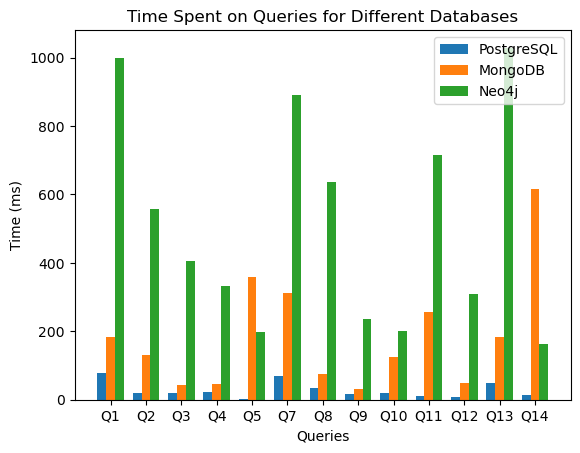

In [2]:
import matplotlib.pyplot as plt

# Queries
Queries = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']

# Time spent for each query in each database
postgresqlT = [76.9, 18.7, 20.7, 21.5, 0.9, 68.5, 35.5, 17.6, 18.6, 12.2, 8, 47.9, 15]
mongodbT = [184, 131, 41.9, 46.1, 360, 311.2, 74.4, 31.5, 124.4, 256, 50, 183, 617]
neo4jT = [1000, 557.8, 405.4, 331, 197.8, 891, 636.8, 237, 200.1, 716.1, 308, 1028.8, 163.4]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = range(len(Queries))

# Plot the bar graphs
plt.bar(x, postgresqlT, width=bar_width, label='PostgreSQL')
plt.bar([i + bar_width for i in x], mongodbT, width=bar_width, label='MongoDB')
plt.bar([i + 2 * bar_width for i in x], neo4jT, width=bar_width, label='Neo4j')

# Add labels and title
plt.xlabel('Queries')
plt.ylabel('Time (ms)')
plt.title('Time Spent on Queries for Different Databases')
plt.xticks([i + bar_width for i in x], Queries)
plt.legend()

# Show plot
plt.show()


### Conclusion:

After conducting a comprehensive comparative analysis for PostgreSQL, MongoDB, and Neo4j, it is evident that each database system offers unique strengths and capabilities tailored to specific use cases and requirements. It's evident from our study that PostgreSQL outperforms the other databases in terms of query speed, despite MongoDB being in close competition. It's worth noting that MongoDB is accessed remotely, while PostgreSQL and Neo4j are local, which may have influenced the results. In terms of data modeling, Neo4j emerges as the most user-friendly option, offering greater flexibility and simplicity compared to MongoDB. Although MongoDB provides considerable flexibility, Neo4j's intuitive approach stands out. Additionally, Neo4j's query language is notably more straightforward and logically organized, enhancing its usability compared to PostgreSQL and MongoDB.